In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gzip
import time 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
try:
    from lsh import LSH
    from utils import GetSimpleData
except:
    sys.path.append("../src")
    print("path to src files: {}".format(sys.path[-1]))
    from lsh import LSH
    from utils import GetSimpleData

path to src files: ../src


In [20]:
def plot_img_from_idx(idx, data):
    img = data[idx].reshape(np.sqrt(784).astype("int"),np.sqrt(784).astype("int"))
    plt.imshow(img)

In [4]:
path = "../../../../data/"
file_train = "train-images-idx3-ubyte.gz"

In [6]:
data_loader = GetSimpleData(path)
x_train, y_train = data_loader.load_mnist()
x_test, y_test = data_loader.load_mnist(kind="test")

In [8]:
f"dimensionality of an image is {len(x_train[0])}"

'dimensionality of an image is 784'

In [10]:
lsh = LSH(x_train[:60000], 100, 5, hash_func="cosine", dist_metric="cosine")
start = time.time()
lsh.build_hashtables()
print(f"building hash tables took {time.time()-start} seconds")

building hash tables took 46.3475878238678 seconds


In [17]:
lsh_eu = LSH(x_train[:3000], 3000, 15, hash_func="cosine", dist_metric="euclidean", bucket_width=57886)
lsh_eu.build_hashtables()

## Query

In [11]:
query_idx = 7020

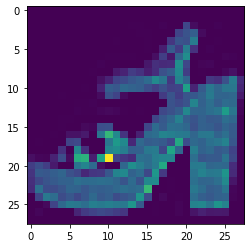

In [21]:
plot_img_from_idx(query_idx, x_test)

## Top 5 retrievel cosine

In [22]:
anns = lsh.get_near_duplicates(x_test[query_idx], num_duplicates=20, add_query_to_db=False)

57876 candidates have been retrieved. Calculate exact distance on those..


../src\lsh.py:21: RuntimeWarning: invalid value encountered in true_divide
  return 1-np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))


In [16]:
k = 8

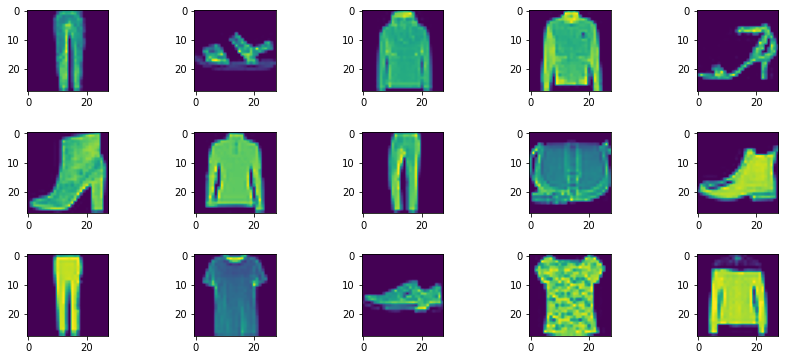

In [18]:
fig, axs = plt.subplots(3,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(15):
    idx = anns[i][0]
    img = x_train[idx].reshape(np.sqrt(784).astype("int"),np.sqrt(784).astype("int"))
    axs[i].imshow(img)
    #axs[i].plot(anna[])

## Top 5 retrievel euclidean

In [19]:
anns_eu = lsh_eu.get_near_duplicates(x_test[query_idx], num_duplicates=20)

NameError: name 'lsh_eu' is not defined

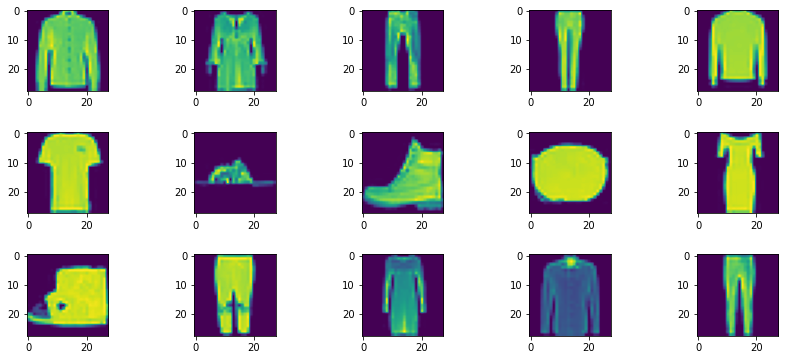

In [24]:
fig, axs = plt.subplots(3,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(15):
    idx = anns_eu[i][0]
    img = x_train[idx].reshape(np.sqrt(784).astype("int"),np.sqrt(784).astype("int"))
    axs[i].imshow(img)
    #axs[i].plot(anna[])

In [23]:
query_cat = y_test[query_idx]

In [24]:
query_cat

5

In [26]:
cats_ret_cos = [y_train[neighbor[0]] for neighbor in anns]
accuracy_cos = np.sum(np.array(cats_ret_cos)==query_cat)/len(anns)

In [27]:
cats_ret_eu = [y_train[neighbor[0]] for neighbor in anns_eu]
accuracy_eu = np.sum(np.array(cats_ret_eu)==query_cat)/len(anns_eu)

NameError: name 'anns_eu' is not defined

In [28]:
print("cosine sim found in {} percent of the cases a similar image with the same category. Euclidean in {} percent of the cases". format(accuracy_cos, accuracy_eu))

NameError: name 'accuracy_eu' is not defined